In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('DoctorVisits-DA.csv')

In [6]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [8]:
df.shape

(5190, 13)

In [10]:
## converting age and income decimal to number
df['age'] = df['age'] * 100

In [12]:
df['income'] = (df['income'] * 10000).round().astype(int)

## changing datatypes
df['age'] = df['age'].astype(int)


In [14]:
df.sample(10)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
2398,2399,0,female,72,2500,5,0,0,yes,no,no,yes,no
156,157,1,female,22,5500,1,0,0,yes,no,no,no,no
1977,1978,0,female,52,2500,3,0,0,yes,no,no,yes,no
611,612,4,female,56,3500,2,14,6,yes,no,no,yes,no
2625,2626,0,male,72,2500,3,0,0,no,no,yes,yes,no
3692,3693,0,male,22,3500,3,0,2,no,no,no,yes,no
572,573,1,female,56,2500,2,0,4,no,no,yes,yes,no
1681,1682,0,female,27,9000,2,0,1,yes,no,no,no,no
1717,1718,0,male,27,13000,0,0,2,no,no,no,no,no
4368,4369,0,male,19,1500,0,0,1,no,yes,no,no,no


In [16]:
df.describe()

,Unnamed: 0,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,40.585934,5831.599229,1.431985,0.861850,1.217534
std,1498.368279,0.798134,20.437323,3689.066984,1.384152,2.887628,2.124266
min,1.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,1298.250000,0.000000,22.000000,2500.000000,0.000000,0.000000,0.000000
50%,2595.500000,0.000000,32.000000,5500.000000,1.000000,0.000000,0.000000
75%,3892.750000,0.000000,62.000000,9000.000000,2.000000,0.000000,2.000000
max,5190.000000,9.000000,72.000000,15000.000000,5.000000,14.000000,12.000000


In [69]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
visits,5190.0,0.301734,0.798134,0.0,0.0,0.0,0.0,9.0
age,5190.0,40.585934,20.437323,19.0,22.0,32.0,62.0,72.0
income,5190.0,5831.599229,3689.066984,0.0,2500.0,5500.0,9000.0,15000.0
illness,5190.0,1.431985,1.384152,0.0,0.0,1.0,2.0,5.0
reduced,5190.0,0.861850,2.887628,0.0,0.0,0.0,0.0,14.0
health,5190.0,1.217534,2.124266,0.0,0.0,0.0,2.0,12.0


In [26]:
df.describe(include="object")

,gender,private,freepoor,freerepat,nchronic,lchronic
count,5190,5190,5190,5190,5190,5190
unique,2,2,2,2,2,2
top,female,no,no,no,no,no
freq,2702,2892,4968,4099,3098,4585


In [28]:
df.isnull().sum()

visits       0
gender       0
age          0
income       0
illness      0
reduced      0
health       0
private      0
freepoor     0
freerepat    0
nchronic     0
lchronic     0
dtype: int64

In [46]:
df.columns

Index(['visits', 'gender', 'age', 'income', 'illness', 'reduced', 'health',
       'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

In [48]:
df.dtypes

visits        int64
gender       object
age           int32
income        int32
illness       int64
reduced       int64
health        int64
private      object
freepoor     object
freerepat    object
nchronic     object
lchronic     object
dtype: object

In [50]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print('We have {} categorical data : {}'.format(len(categorical_features), categorical_features))
print('\nWe have {} numerical data : {}'.format(len(numeric_features), numeric_features))

We have 6 categorical data : ['gender', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic']

We have 6 numerical data : ['visits', 'age', 'income', 'illness', 'reduced', 'health']


# 1. Number of Duplicates found in the Dataset 

In [51]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")

Number of duplicates: 0


# 2. Find out Total number of People based on their count of illness.

In [47]:
illness_count = df['illness'].value_counts()
print("Total number of people based on their count of illness")
print(illness_count)

Total number of people based on their count of illness
illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64


# 3. Gender wise illness 

In [63]:
gender_wise_illness = df.groupby('gender')['illness'].sum()
print("\
Gender wise illness:")
print(gender_illness)

Gender wise illness:
gender
female    4353
male      3079
Name: illness, dtype: int64


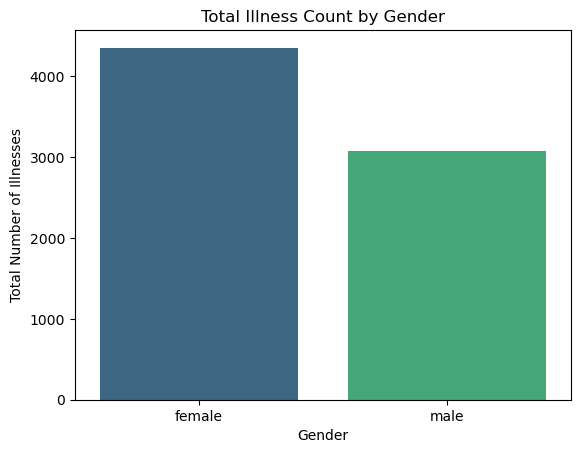

In [65]:
sns.barplot(x=gender_wise_illness.index, y=gender_wise_illness.values, 
            palette='viridis',hue=gender_wise_illness.index, legend=False)
plt.title("Total Illness Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Number of Illnesses")
plt.show()

# 4. Analyse Maximum, Minimum and Medium income People 

In [88]:
## statistical analysis of income
income_analysis = df['income'].agg(['min', 'max', 'median'])
print('Income Analysis')
print(income_analysis)

Income Analysis
min           0.0
max       15000.0
median     5500.0
Name: income, dtype: float64


C:\Users\Priyanshu Prakash\AppData\Local\Temp\ipykernel_17244\3977126257.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', palette='viridis')


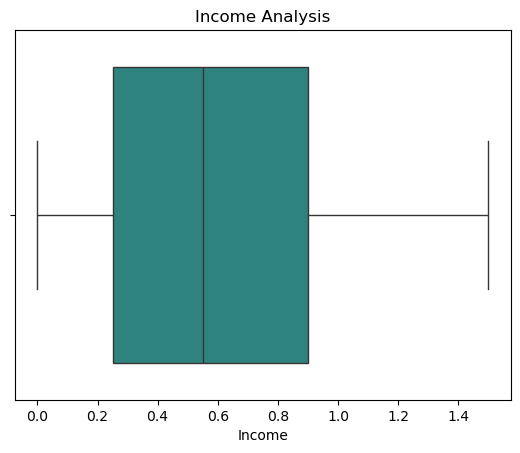

In [71]:
sns.boxplot(data=df, x='income', palette='viridis')
plt.title("Income Analysis")
plt.xlabel("Income")
plt.show()

## 5. Find the number of days of reduced activity of Male and Female separately due to illness. 

Days of Reduced Activity by Gender:
gender
female    2636
male      1837
Name: reduced, dtype: int64


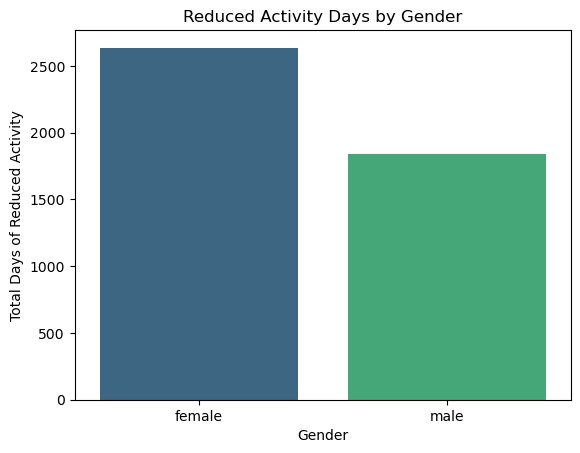

In [73]:
reduced_activity_by_gender = df.groupby('gender')['reduced'].sum()
print("Days of Reduced Activity by Gender:")
print(reduced_activity_by_gender)

# Bar plot of reduced activity by gender
sns.barplot(x=reduced_activity_by_gender.index, y=reduced_activity_by_gender.values, palette='viridis',
            hue=reduced_activity_by_gender.index, legend=False)
plt.title("Reduced Activity Days by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Days of Reduced Activity")
plt.show()

# 6. Visualize, is there any missing values in the dataset using Heat map chart

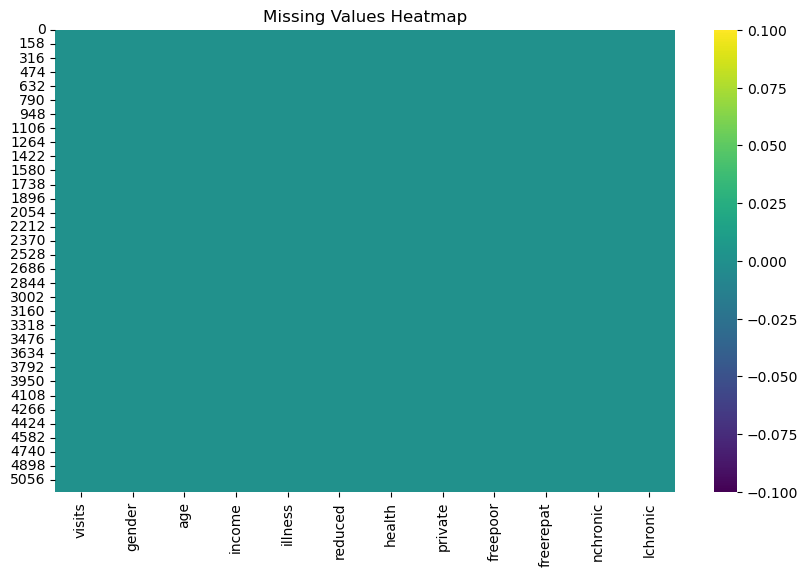

In [75]:
# Heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# 7. Correlation between variables (means columns) of the dataset and identify which variables are mostly correlated. 

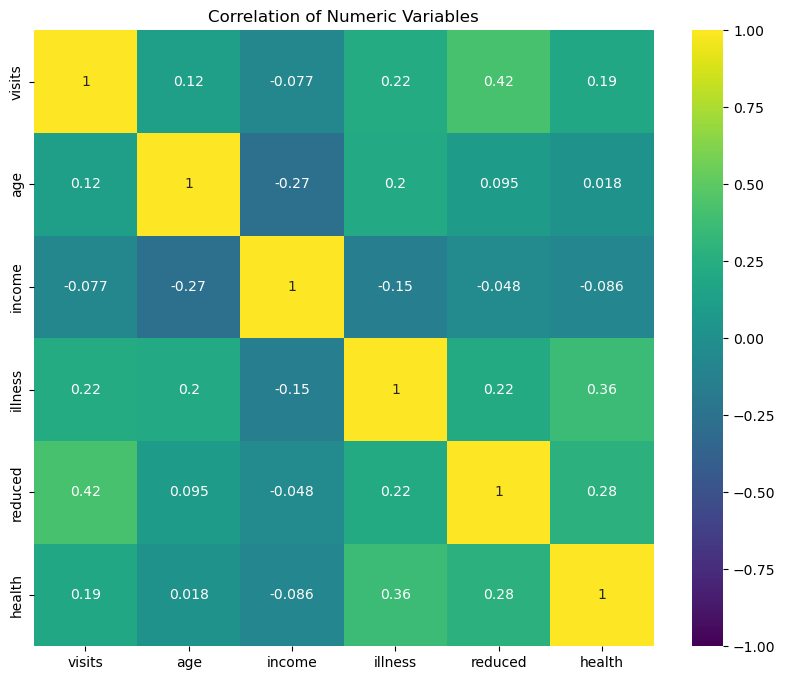

In [114]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Correlation of Numeric Variables")
plt.show()

# 8. Analyse how income of People affects the number of visits to the Hospital 

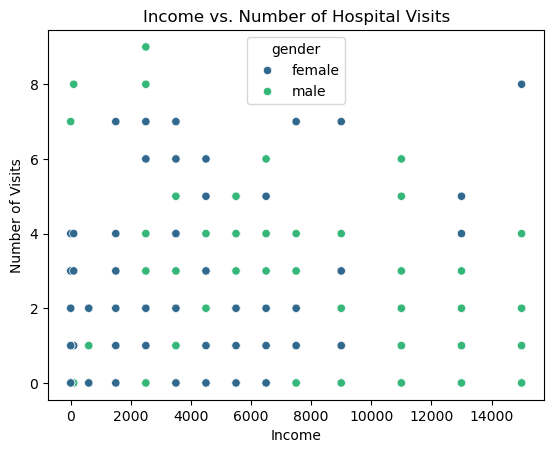

In [117]:
## plot ot represent income vs visit
sns.scatterplot(data=df, x='income', y='visits', hue='gender', palette='viridis')
plt.title("Income vs. Number of Hospital Visits")
plt.xlabel("Income")
plt.ylabel("Number of Visits")
plt.show()

# 9. Count and Visualize the number of Males and Females affected by illness.

Gender wise illness:
illness    0    1    2    3    4    5
gender                               
female   679  834  531  333  167  158
male     875  804  415  209  107   78


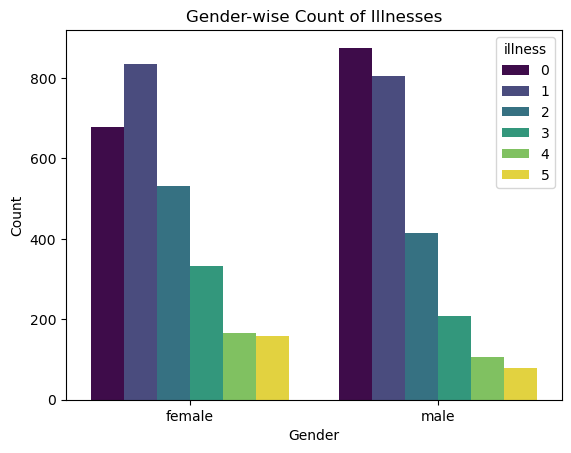

In [31]:
gender_illness = df.groupby(['gender', 'illness']).size().unstack()
print("\
Gender wise illness:")
print(gender_illness)

sns.countplot(data=df, x='gender', hue='illness', palette='viridis')
plt.title("Gender-wise Count of Illnesses")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

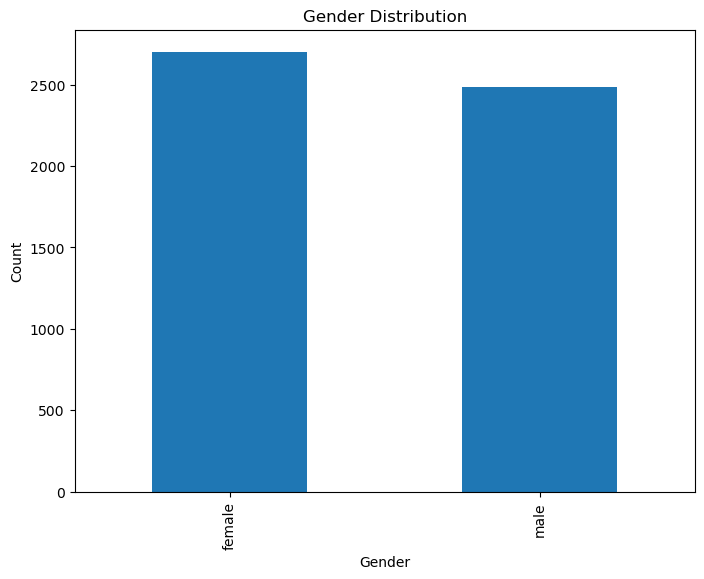

In [13]:
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 10. Visualize the Percentage of People getting Govt. health insurance due to low income, due to old age. Also calculate the Percentage of People having Private Health Insurance. 

In [57]:
# Ensure columns are present and calculate percentages, treating missing values as 0
if 'private' in df.columns and 'freepoor' in df.columns and 'freerepat' in df.columns:
    private_insurance_pct = (df['private'] == 'Yes').mean() * 100 if df['private'].notna().any() else 0
    freepoor_pct = (df['freepoor'] == 'Yes').mean() * 100 if df['freepoor'].notna().any() else 0
    freerepat_pct = (df['freerepat'] == 'Yes').mean() * 100 if df['freerepat'].notna().any() else 0

    # Print the calculated percentages
    print(f"Percentage with Private Insurance: {private_insurance_pct:.2f}%")
    print(f"Percentage with Govt Insurance (Low Income): {freepoor_pct:.2f}%")
    print(f"Percentage with Govt Insurance (Old Age): {freerepat_pct:.2f}%")

    # Pie chart for insurance distribution
    labels = ['Private Insurance', 'Govt Insurance (Low Income)', 'Govt Insurance (Old Age)']
    sizes = [private_insurance_pct, freepoor_pct, freerepat_pct]
    colors = ['#ff9999', '#66b3ff', '#99ff99']

    # Check if there’s at least one non-zero size
    if any(size > 0 for size in sizes):
        plt.figure(figsize=(8, 6))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title("Insurance Type Distribution")
        plt.show()
    else:
        print("No data available to display in the pie chart.")
else:
    print("Required columns are missing from the dataset.")

Percentage with Private Insurance: 0.00%
Percentage with Govt Insurance (Low Income): 0.00%
Percentage with Govt Insurance (Old Age): 0.00%
No data available to display in the pie chart.


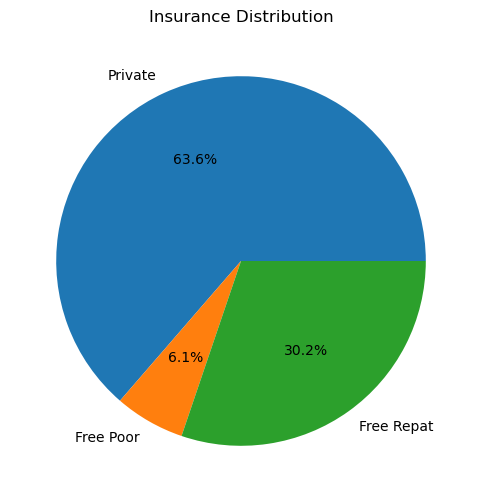

In [15]:
insurance_data = {
    'Private': (df['private'] == 'yes').mean() * 100,
    'Free Poor': (df['freepoor'] == 'yes').mean() * 100,
    'Free Repat': (df['freerepat'] == 'yes').mean() * 100
}
plt.figure(figsize=(8, 6))
plt.pie(insurance_data.values(), labels=insurance_data.keys(), autopct='%1.1f%%')
plt.title('Insurance Distribution')
plt.show()

# 11. Plot bar chart to analyse the reduced days of activity due to illness based on Gender 

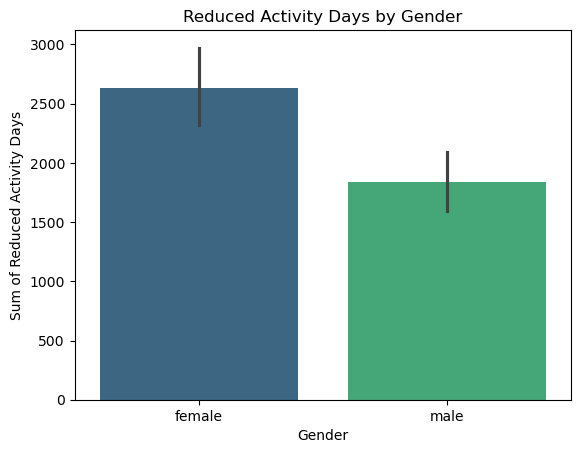

In [141]:
# bar chart for reduced activity days by gender
sns.barplot(data=df, x='gender', y='reduced', estimator=sum, palette='viridis',hue='gender', legend=False)
plt.title("Reduced Activity Days by Gender")
plt.xlabel("Gender")
plt.ylabel("Sum of Reduced Activity Days")
plt.show()

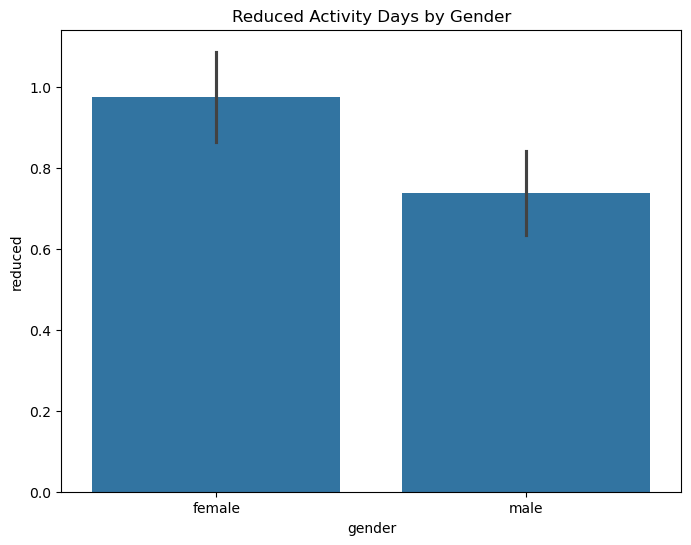

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='gender', y='reduced')
plt.title('Reduced Activity Days by Gender')
plt.show()

# 12. Relation between Health status and Activity reduction using heat map chart. 

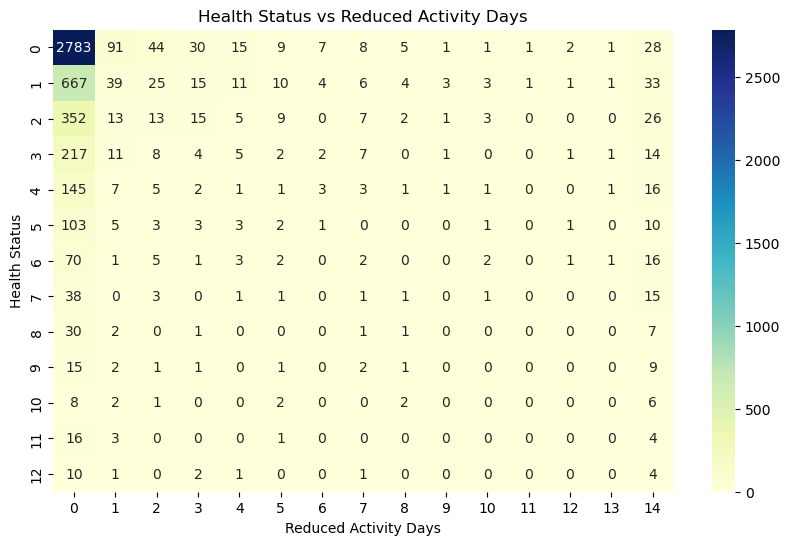

In [133]:
# Pivot table for health vs reduced activity days
health_reduction_pivot = df.pivot_table(index='health', columns='reduced', aggfunc='size', fill_value=0)

# Heatmap of health status vs reduced activity
plt.figure(figsize=(10, 6))
sns.heatmap(health_reduction_pivot, cmap='YlGnBu', annot=True, fmt="d")
plt.title("Health Status vs Reduced Activity Days")
plt.xlabel("Reduced Activity Days")
plt.ylabel("Health Status")
plt.show()

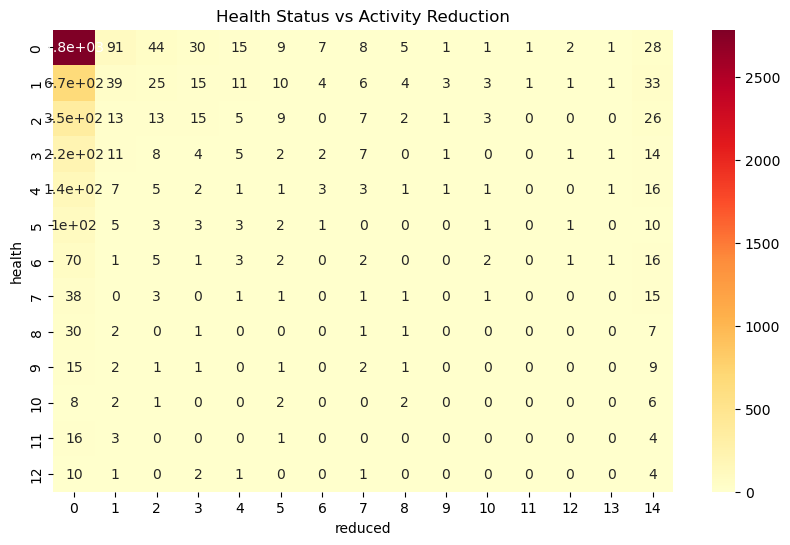

In [77]:
health_reduced = pd.crosstab(df['health'], df['reduced'])
plt.figure(figsize=(10, 6))
sns.heatmap(health_reduced, annot=True, cmap='YlOrRd')
plt.title('Health Status vs Activity Reduction')
plt.show()